#  А/B-тест для интернет-магазина

В ходе нашего исследования мы приоритизируем гипотезы, составленные отделом маркетинга, запустим A/B-тест и проанализируем результаты.

**Цель** - провести A/B-тест, чтобы выяснить, что позволит интернет-магазину увеличить выручку.

**Ход исследования:**
1. Приоритизация гипотез.
2. Анализ A/B-теста.

**Описание данных:**\
\
*Файл /datasets/hypothesis.csv (информация о гипотезах)*\
\
`Hypothesis` — краткое описание гипотезы;\
`Reach` — охват пользователей по 10-балльной шкале;\
`Impact` — влияние на пользователей по 10-балльной шкале;\
`Confidence` — уверенность в гипотезе по 10-балльной шкале;\
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале.\
\
*Файл /datasets/orders.csv (информация о заказах)*\
\
`transactionId` — идентификатор заказа;\
`visitorId` — идентификатор пользователя, совершившего заказ;\
`date` — дата, когда был совершён заказ;\
`revenue` — выручка заказа;\
`group` — группа A/B-теста, в которую попал заказ.\
\
*Файл /datasets/visitors.csv (информация о посетителях)*\
\
`date` — дата;\
`group` — группа A/B-теста;\
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста





## 1. Приоритизация гипотез

In [1]:
# Импортируем библиотеки, необходимые для исследования

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
pd.options.display.max_colwidth = 120
data = pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Применим фреймворк ICE для приоритизации гипотез**

In [37]:
data['ICE'] = (data['Impact'] * data['Confidence']) / data['Efforts']
data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы по ICE - 8, 0, 7.

**Применим фреймворк RICE для приоритизации гипотез**

In [4]:
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence']) / data['Efforts']
data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending = False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE - 7, 2, 0.

При применении RICE вместо ICE изменилась приоритизация гипотез. В первом случае мы получили 8 гипотезу, как наиболее перспективную, но у нее **низкий параметр Reach** (скольких пользователей затронет изменение, которое мы хотим внести) - всего 1. И правда, если запустить акцию, дающую скидку на товар в день рождения, она охватит не так много людей, как другие гипотезы. Поэтому при применении RICE, эта гипотеза ушла на более низкую позицию, и **приоритетными стали гипотезы - 7, 2, 0**.

## 2. Анализ A/B-теста

**Мы провели A/B-тест и получили результаты, которые описаны в файлах:**

In [5]:
# в отдельные датафрэймы поместим данные о заказах и посетителях интернет-магазина
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [6]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


**Проведем предобработку данных, прежде чем их анализировать.**

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
# приведем названия столбцов к нижнему регистру в датафрэйме orders
orders.columns = orders.columns.str.lower() 

In [11]:
# поменяем тип данных у дат в обоих датафрэймах
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [12]:
# проверим данные на пропущенные значения 
orders.isna().sum()

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

In [13]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [14]:
# проверим данные на дубликаты
orders.duplicated().sum()

0

In [15]:
visitors.duplicated().sum()

0

**Явных дубликатов нет. Посмотрим, сколько всего заказов и посетителей интернет-магазина было для того, чтобы проверить корректность разбиения пользователей на группы**

In [16]:
groups = orders.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid':'orders'})\
               .join((visitors.groupby('group').agg({'visitors':'sum'})))
display(groups)

,orders,visitors
group,,
A,557,18736
B,640,18916


**Проверим, нет ли пользователей, которые попали в обе группы теста?**

In [17]:
# создадим переменные, в которые сохраним ID пользователей в каждой группе
visitorsA = orders[orders['group']=='A']['visitorid']
visitorsB = orders[orders['group']=='B']['visitorid']

# а теперь посмотрим, есть ли одни и те же пользователи, которые попали в обе группы сразу
visitorsAB = orders.loc[orders['visitorid'].isin(visitorsA)& orders['visitorid'].isin(visitorsB),'visitorid'].unique()
print(len(visitorsAB))

58


Получатся, 58 пользователей попали и в группу А, и в группу B. Логично будет их удалить из обеих выборок.

In [18]:
orders = orders.query("visitorid not in @visitorsAB")

**Построим график кумулятивной выручки по группам**

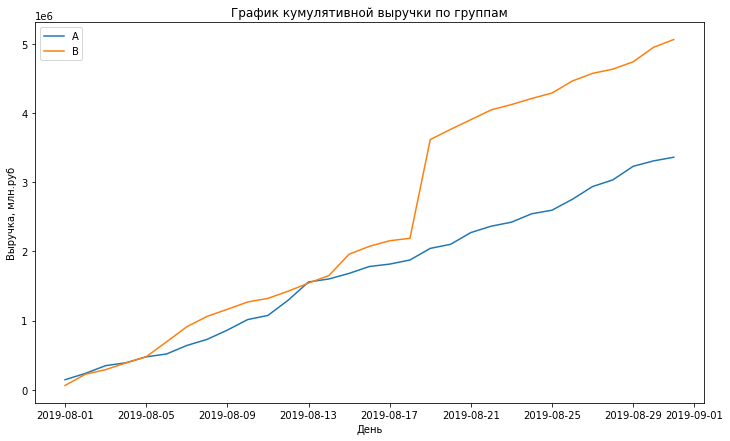

In [19]:
# создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders
# избавимся от дубликатов методом drop_duplicates()
datesGroups = orders[['date', 'group']].drop_duplicates()

# добавим переменную с агрегированными кумулятивными по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# добавим переменную с агрегированными кумулятивными по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# строим график выручки группы А
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# строим график выручки группы А
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.xlabel('День')
plt.ylabel('Выручка, млн.руб')
plt.title('График кумулятивной выручки по группам')
plt.show()

По графику видно, что группа A растет линейно, а группа В почти с самого начала вырвалась вперед и продолжала лидировать до конца теста (кроме одного дня - 14 августа, где мы видим пересечение графиков групп А и В). Возможно, в группе B есть аномально большие заказы или необычно большое число заказов, из-за которых мы наблюдаем скачок в районе 18 августа. Проверим это позже.

**Построим график кумулятивного среднего чека по группам**

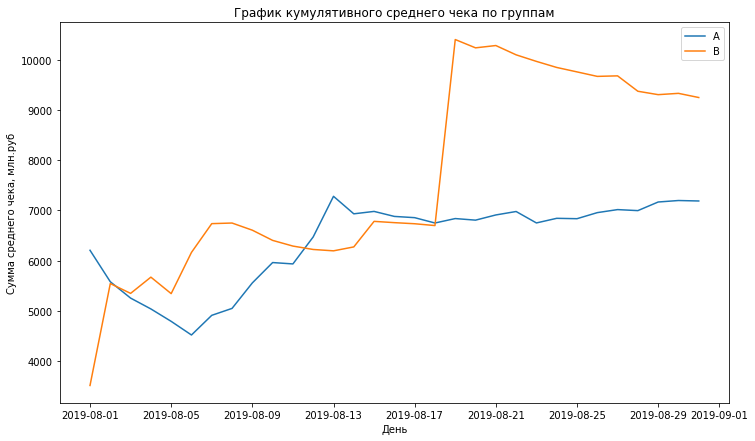

In [20]:
plt.figure(figsize=(12,7))
# строим график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
# строим график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.xlabel('День')
plt.ylabel('Сумма среднего чека, млн.руб')
plt.title('График кумулятивного среднего чека по группам')
plt.show()

Кумулятивное значение среднего чека колеблется, то повышается, то падает и наоборот. В группе А средний чек с середины теста более стабильный. В то время как в группе B средний чек выше, но с резкими перепадами, например, в районе того самого 18 августа. Это может сигнализировать об аномально крупных заказах в выборке. 

**Построим график относительного изменения кумулятивного среднего чека группы B к группе A**

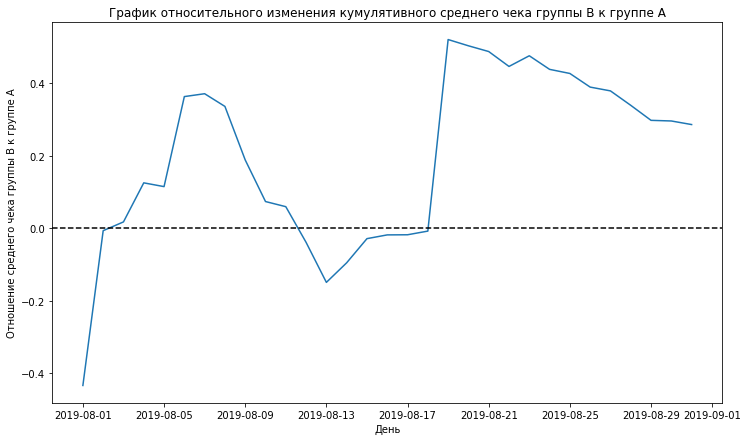

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('День')
plt.ylabel('Отношение среднего чека группы B к группе А')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Скорее всего в выборках присутствуют крупные заказы. График относительного изменения кумулятивного среднего чека группы B к группе A подтверждает наши выводы - средний чек у группы B выше. 

**Построим график кумулятивной конверсии по группам**

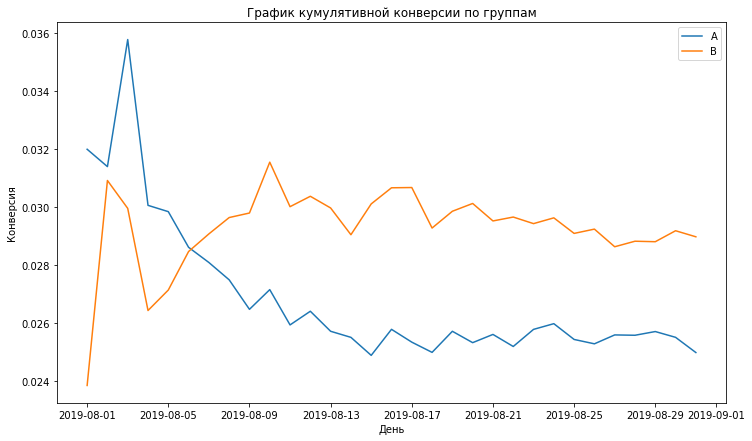

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('День')
plt.ylabel('Конверсия')
plt.title('График кумулятивной конверсии по группам')
plt.show()

График колеблется почти симметрично, кумулятивная конверсия у группы B выше.

**Построим график относительного изменения кумулятивной конверсии группы B к группе A**

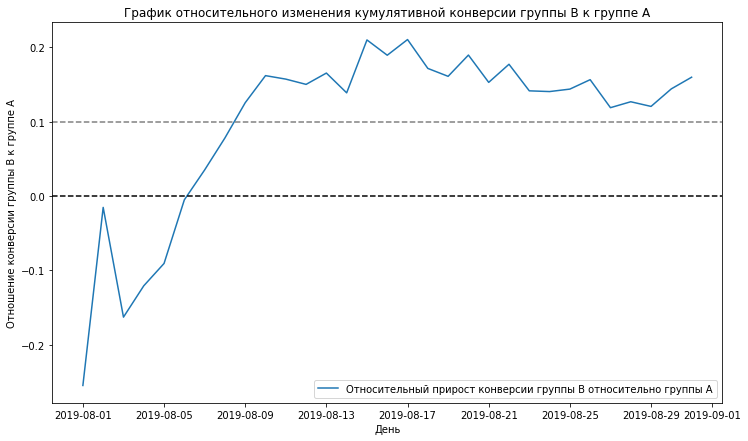

In [23]:
# объединим данные в табличку со значениями с накоплением
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строим отношение конверсий
plt.figure(figsize=(12,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.10, color='gray', linestyle='--')
plt.xlabel('День')
plt.ylabel('Отношение конверсии группы B к группе А')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.show()

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Её конверсия росла и снова падала, но теперь постепенно растёт. На протяжении почти всего теста конверсия группы B была выше на 10% конверсии группы А.

**Построим точечный график количества заказов по пользователям**

           user  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


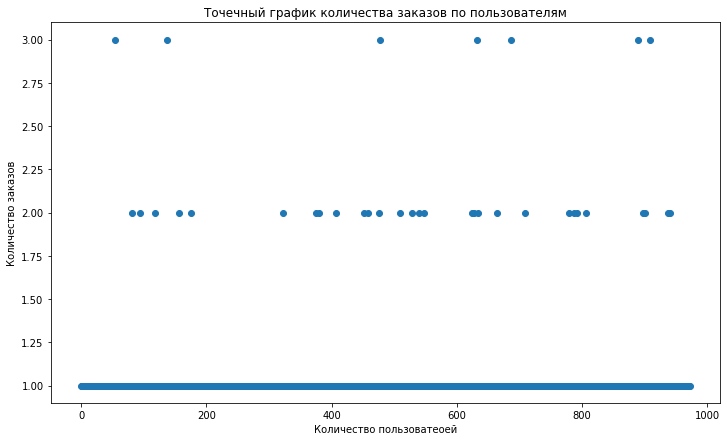

In [24]:
# Найдём число заказов по пользователям — создадим датафрейм c двумя столбцами
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['user', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(12,7))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.xlabel('Количество пользоватеоей')
plt.ylabel('Количество заказов')
plt.title('Точечный график количества заказов по пользователям')
plt.show()

Пользователей, сделавших **более одного заказа** значитально меньше и они вполне могут быть аномальными. Узнаем, 1 заказ - это много или мало, посчитав перцентили.

**Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.**

In [25]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей сделавших больше 1 заказа, и не больше 1%, кто сделал больше 2 заказов. Аномальными будем считать пользователей, сделавших более 2 заказов.

**Построим точечный график стоимостей заказов**

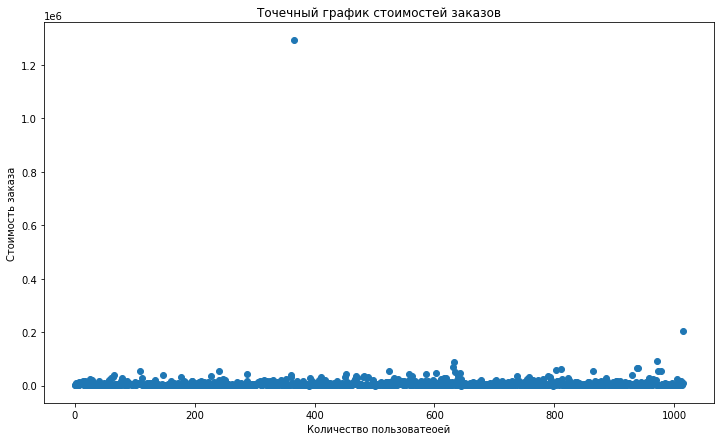

In [26]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12,7))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Количество пользоватеоей')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимостей заказов')
plt.show()

По графику мы видим выбросы в районе 200к и 1,3 млн. Остальные заказы по стоимости гораздо меньше.

**Посчитаем 95-й и 99-й перцентили стоимости заказов**

In [27]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не более, чем у 5% пользователей заказ дороже, чем 27000 и не более, чем у 1% - дороже 54000. Аномальными будем считать заказы дороже 54000.

**Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным**


In [28]:
# создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['user', 'orders']
# в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['user', 'orders']


ordersByUsersB = (
    orders[orders['group'] == 'B']
    
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['user', 'orders'] 


# объявим переменные
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum()\
                     - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum()\
                     - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Проверим гипотезы:\
H0 - конверсия группы А равна конверсии группы В\
H1 - конверсии групп не равны\
\
alpha = 0.05

In [29]:
print("p-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.01102
Относительный прирост конверсии группы B: 0.160


Так как p-value меньше 0.05, первую гипотезу мы отвергаем. Анализ "сырых данных" позволил нам выявить, что в конверсиях между группами наблюдается статистически значимая разница. Относительный прирост конверсии группы B - 16%.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**

In [30]:
raw_mean_revenueA = orders[orders['group']=='A']['revenue'].mean()
raw_mean_revenueB = orders[orders['group']=='B']['revenue'].mean()
print('Средний чек группы А:', raw_mean_revenueA)
print('Средний чек группы B:', raw_mean_revenueB)

Средний чек группы А: 7189.4358974358975
Средний чек группы B: 9249.94890510949


Проверим гипотезы:\
H0 - средний чек группы А равен среднему чеку группы В\
H1 - средние чеки групп не равны\
\
alpha = 0.05

In [31]:
# применим статистический критерий Манна-Уитни
print('p_value:{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# выведем относительный прирост среднего чека группы B
print("Относительный прирост среднего чека группы B: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p_value:0.829
Относительный прирост среднего чека группы B: 0.287


P-value больше 0,05, потому статистически значимых различий в средних чеках групп А и В нет. Относительный прирост среднего чека группы B – 28,7%. Существенная относительная разница при отсутствии статистической значимости указывает на влияние выбросов на метрику.

**Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным**

In [32]:
# примем за аномальных пользователей тех, кто совершил больше 2 заказов, или совершил заказ на сумму свыше 54 000 рублей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 54000]['visitorid']

# объединим пользователей в таблице abnormalUsers, удалим дубликаты и отсортируйте по возрастанию
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64


In [33]:
# объявим переменные с "очищенными данными"
sampleA_filtered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['user'].isin(abnormalUsers))]\
                  ['orders'], pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors']\
                  .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0) 


sampleB_filtered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['user'].isin(abnormalUsers))]\
                  ['orders'], pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors']\
                  .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Проверим гипотезы:\
H0 - конверсия группы А равна конверсии группы В\
H1 - конверсии групп не равны\
\
alpha = 0.05

In [34]:
# применим статистический критерий Манна-Уитни к полученным выборкам
print("p_value: {0:.5f}".format(stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]))
print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB_filtered.mean() / sampleA_filtered.mean() - 1))

p_value: 0.00702
Относительный прирост конверсии группы B: 0.189


Вновь p-value меньше 0.05. Анализ "очищенных данных" подтвердил, что в конверсиях между группами есть статистически значимые различия. Относительный прирост конверсии группы B - 18,9%.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

In [35]:
# Посчитаем средние чеки групп А и B
print(
    "Среднйи чек группы A: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()))

print(
    "Среднйи чек группы B: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()))

Среднйи чек группы A: 6487.025
Среднйи чек группы B: 6277.266


Проверим гипотезы:\
H0 - средний чек группы А равен среднему чеку группы В\
H1 - средние чеки групп не равны\
\
alpha = 0.05

In [36]:
# применим статистический критерий Манна-Уитни к полученным выборкам
print(
    "p_value: {0:.3f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)


print(
    "Относительный прирост среднего чека группы B: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p_value: 0.788
Относительный прирост среднего чека группы B: -0.032


По анализу "очищенных данных" мы видим, что статичтически значимых различий между средними чеками в группах нет. Прирост среднего чека группы B отрицательный. Мы видим существенные различия результатов в сравнении с неочищенными данными, там картина была другой: средний чек был выше и относительный прирост тоже. 

# Выводы

Мы провели исследование, в ходе которого приоритезировали гипотезы, провели A-B тест и вот какие результаты получили.

**1. Статистическая значимость различий в конверсии между группами:**

* **по "сырым данным":**\
p-value: 0.01102\
Относительный прирост конверсии группы B: 0.160\
Так как p-value меньше 0.05, первую гипотезу о равенстве конверсий мы отвергаем. Анализ "сырых данных" позволил нам выявить, что в конверсиях между группами есть различия, они не равны. Относительный прирост конверсии группы B - 16%.

* **по "очищенным данным":**\
p_value: 0.00702\
Относительный прирост конверсии группы B: 0.189\
Вновь p-value меньше 0.05. Анализ "очищенных данных" подтвердил, что в конверсиях между группами есть различия. Относительный прирост конверсии группы B - 18,9%.

Анализ статистической значимости различий в конверсии между группами по сырым и очищенным данным дал один результат: в конверсиях между группами есть статистическое различие, у группы B конверсия больше.

**2. Статистическая значимость различий в среднем чеке между группами:**

* **по "сырым данным":**\
Средний чек группы А: 7189.4358974358975\
Средний чек группы B: 9249.94890510949\
p_value:0.829\
Относительный прирост среднего чека группы B: 0.287\
P-value больше 0,05, потому статистически значимых различий в средних чеках групп А и В нет. Относительный прирост среднего чека группы B – 28,7%.

* **по "очищенным данным":**\
\
Среднйи чек группы A: 6487.025\
Среднйи чек группы B: 6277.266\
p_value: 0.788\
Относительный прирост среднего чека группы B: -0.032\
По анализу "очищенных данных" мы видим, что статичтически значимых различий между средними чеками в группах нет. Но прирост среднего чека группы B отрицательный.\
\
Анализ статистической значимости различий в среднем чеке между группами показал колосальную разницу между "сырыми" и "очищенными" данными. При "сырых" данных средний чек группы B больше группы A, в то время, как при "очищенных" данных картина другая: средний чек у группы B меньше и относительного прироста нет.\
\
Исходя из обнаруженных фактов, мы можем сделать вывод, что тест следует остановить. **Группа B показала себя лучше.** Несмотря на то, что средний чек не меняется, конверсия ощутимо выше в группе В. С ростом конверсии будет расти и выручка интернет-магазина.